# Child Detention in US Customs and Bordern Protection - Complete Statistical Analysis and Visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import warnings
#warnings.filterwarnings("ignore")

Data from US Customs and Border Protection obtained and published by The Marshall Project and used in 500,000 Kids, 30 Million Hours: Trump’s Vast Expansion of Child Detention.

Link: https://data.world/government/us-customs-and-border-protection-child-detentions-2017-20?utm_campaign=data_digest&utm_medium=email&_hsmi=103587352&_hsenc=p2ANqtz-9WDVm7TQGGYyteRLkjCGPKTJ7qUCTdkybTOtA-4L1IgScvDTwUa9dNpsxauSK0ZcYUuzLXHc3sFlqHHg27AaSs9DQB2g&utm_content=103587352&utm_source=hs_email

In [5]:
df = pd.read_csv('../../data/cbp_foia_response-oct_2020.csv', low_memory=False)

In [6]:
df.head()

,date_in,date_out,app_date,hours_in_custody,age_group,gender,citizenship,border,sector,field_office,source
0,2017-01-20 00:10:00,2017-01-20 10:08:00,NaN,9.950000,6-8 years,Female,EL SALVADOR,SBO,(b)(7)(E ),NaN,BP
1,2017-01-20 00:15:00,2017-01-24 17:30:00,NaN,113.233333,3-5 years,Female,GUATEMALA,SBO,(b)(7)(E ),NaN,BP
2,2017-01-20 00:22:00,2017-01-24 17:47:00,NaN,113.416667,3-5 years,Female,BRAZIL,SBO,(b)(7)(E ),NaN,BP
3,2017-01-20 00:30:00,2017-01-21 06:35:00,NaN,30.083333,12-14 years,Male,EL SALVADOR,SBO,(b)(7)(E ),NaN,BP
4,2017-01-20 00:30:00,2017-01-21 13:03:00,NaN,36.533333,3-5 years,Male,HONDURAS,SBO,(b)(7)(E ),NaN,BP


In [7]:
df.shape

(583808, 11)

In [8]:
df.isna().sum()

date_in                  3
date_out               755
app_date            488818
hours_in_custody       715
age_group               21
gender                   6
citizenship              0
border               94990
sector               94990
field_office        488818
source                   0
dtype: int64

<AxesSubplot:>

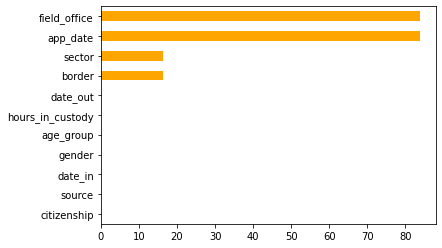

In [9]:
# Quick plot of percentage nan values 
percent_nan = df.isnull().sum() * 100 / len(df)
percent_nan.sort_values(inplace =True)
percent_nan.plot.barh(color = 'orange', x = 'Percent of NaN values')

Lets look at all 4 of these variables

In [10]:
# Values and value counts for field_office
print('The unique values for field office are: \n', df['field_office'].unique(),'\n')
print('*'*40)
print('The value counts are:')
df.field_office.value_counts()

The unique values for field office are: 
 [nan 'EL PASO' 'TUCSON' 'LAREDO' 'SAN DIEGO'] 

****************************************
The value counts are:


LAREDO       28424
SAN DIEGO    25259
EL PASO      23140
TUCSON       18167
Name: field_office, dtype: int64

<AxesSubplot:>

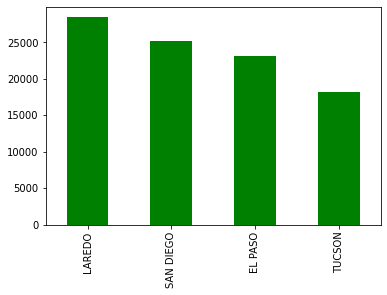

In [11]:
# Quick plot 
df.field_office.value_counts().plot.bar(color = 'green')

In [12]:
# What does app_date look like within the df and is it not the same as date_in? (app_date = aprehension date) 
df[df['app_date'].notnull()].head(3)

,date_in,date_out,app_date,hours_in_custody,age_group,gender,citizenship,border,sector,field_office,source
488818,2017-01-17 14:04:00,2017-01-21 11:29:00,2017-01-20 09:32:31,93.42,3-5 years,M - MALE,GUATEMALA,NaN,NaN,EL PASO,OFO
488819,2017-01-17 17:33:00,2017-01-21 08:20:00,2017-01-20 08:39:48,86.78,6-8 years,M - MALE,GUATEMALA,NaN,NaN,EL PASO,OFO
488820,2017-01-17 17:41:00,2017-01-21 08:20:00,2017-01-20 08:41:02,86.65,6-8 years,F - FEMALE,GUATEMALA,NaN,NaN,EL PASO,OFO


It is not. However, we will be dropping the app_date column since we will only be focusing on date_in and date_out.

In [13]:
# Values and value counts for borders
print('The unique values for border are: \n', df['border'].unique(),'\n')
print('*'*40)
print('The value counts are:')
df.border.value_counts()

The unique values for border are: 
 ['SBO' 'CBO' 'NBO' nan] 

****************************************
The value counts are:


SBO    487991
NBO       577
CBO       250
Name: border, dtype: int64

Borders:
- SBO: South Border
- CBO: Costal Border
- NBO: Nortern Border

<AxesSubplot:>

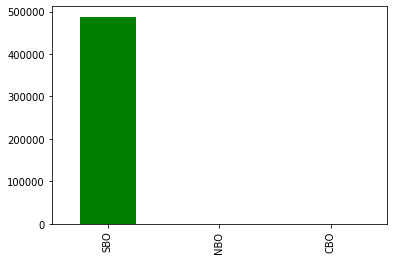

In [14]:
# Quick plot 
df.border.value_counts().plot.bar(color = 'green')

We see that most of the detentions happened on the southern border. Out of all non-null values, 99.8% of them occurred at SBO. Because we will be focsing on nation-wide detentions, we will be dropping this columns as well.

In [15]:
# Values and value counts for sector 
print('The unique values for sector are: \n', df['sector'].unique(),'\n')
print('*'*40)
print('The value counts are:')
df.sector.value_counts()

The unique values for sector are: 
 ['(b)(7)(E )' nan] 

****************************************
The value counts are:


(b)(7)(E )    488818
Name: sector, dtype: int64

In [16]:
# Values and value counts
print('The unique values for source are: \n', df['source'].unique(),'\n')
print('*'*40)
print('The value counts are:')
df.source.value_counts()

The unique values for source are: 
 ['BP' 'OFO'] 

****************************************
The value counts are:


BP     488818
OFO     94990
Name: source, dtype: int64

Data source:
- CBP Office of Field Operations (OFO) child detentions: Detentions of children at ports of entry by the U.S. Customs and Border Protection Border Patrol between mid-January of 2017 and late January of 2020.
- CBP Border Patrol (BP) child detentions: Detentions of children between ports of entry by the U.S. Customs and Border Protection Office of Field Operations between mid-January of 2017 and mid-June of 2020.

<AxesSubplot:>

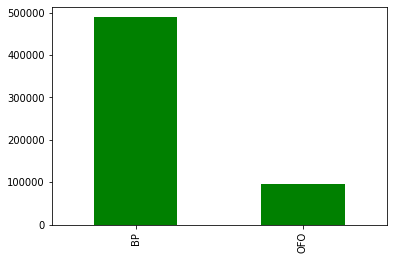

In [17]:
# Quick plot for source variable
df.source.value_counts().plot.bar(color = 'green')

For the purpose of this analysis we will only be focsing on date_in, date_out, hours_in_custody, age_group, gender, and citizenship columns. 

In [18]:
# Dropping columns 
df.drop(['app_date', 'border', 'sector', 'field_office', 'source'], axis=1, inplace=True)

In [19]:
df.columns

Index(['date_in', 'date_out', 'hours_in_custody', 'age_group', 'gender',
       'citizenship'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583808 entries, 0 to 583807
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date_in           583805 non-null  object 
 1   date_out          583053 non-null  object 
 2   hours_in_custody  583093 non-null  float64
 3   age_group         583787 non-null  object 
 4   gender            583802 non-null  object 
 5   citizenship       583808 non-null  object 
dtypes: float64(1), object(5)
memory usage: 26.7+ MB


In [21]:
df.isna().sum()

date_in               3
date_out            755
hours_in_custody    715
age_group            21
gender                6
citizenship           0
dtype: int64

In [22]:
# Dropping rows with nan values
df = df.dropna()
df.shape

(582732, 6)

In [23]:
# Converting dates to datetime 
df[['date_in', 'date_out']] = df[['date_in', 'date_out']].apply(pd.to_datetime)

In [24]:
df.describe()

,hours_in_custody
count,582732.000000
mean,64.835586
std,54.768272
min,-13.820000
25%,31.050000
50%,53.116667
75%,85.900000
max,4902.300000


Definitely outliers in the dataset.

In [25]:
# Converting float to int 
df['hours_in_custody'] = df['hours_in_custody'].astype(int)

/Users/karlamuller/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


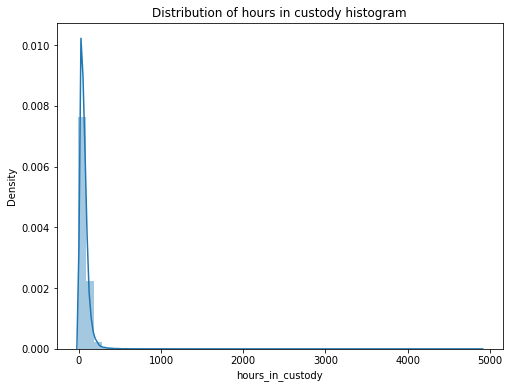

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(df.hours_in_custody)
plt.title('Distribution of hours in custody histogram')
plt.show()

/Users/karlamuller/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


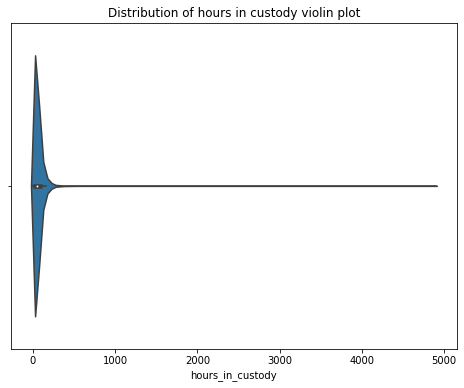

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(df.hours_in_custody)
plt.title('Distribution of hours in custody violin plot')
plt.show()

In [28]:
df.groupby(df.age_group).agg(['mean','count'])

hours_in_custody        
                         mean   count
age_group                            
1-2 years           67.154438   53057
12-14 years         65.864842   78893
15-18 years         57.168998  190600
3-5 years           68.506788   91786
6-8 years           69.282660   85028
9-11 years          68.307484   68423
Under 1 year        66.067180   14945

<AxesSubplot:title={'center':'Age Group Count'}, xlabel='age_group'>

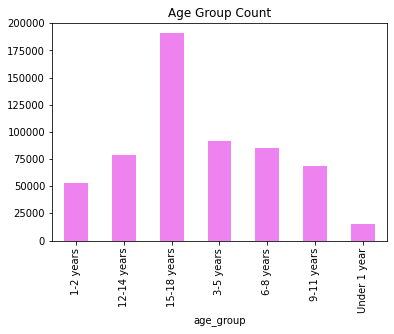

In [29]:
df_agegroup = df.groupby(['age_group'])['hours_in_custody'].count()
df_agegroup.plot.bar(color = 'violet', title='Age Group Count')

In [30]:
df.groupby(df.citizenship).agg(['mean','count'])

hours_in_custody      
                        mean count
citizenship                       
AFGHANISTAN        75.800000     5
ALBANIA            74.066667    15
ANGOLA             62.228145   469
ARGENTINA          45.944444    18
ARMENIA            82.701711   409
...                      ...   ...
URUGUAY            40.038462    26
UZBEKISTAN         48.971530   562
VENEZUELA          43.762245  3634
VIETNAM            77.382222   450
YEMEN              60.250000     4

[111 rows x 2 columns]

In [32]:
# Dataframe of counts and mean for each country
df_citizen = pd.DataFrame({'count': df.groupby(['citizenship']).size()})
df_citizen = df_citizen.sort_values(by='count', ascending=False).reset_index()
df_citizen = df_citizen[:20]
df_citizen

,citizenship,count
0,GUATEMALA,211490
1,HONDURAS,173297
2,MEXICO,86456
3,EL SALVADOR,68479
4,BRAZIL,13767
5,NICARAGUA,5529
6,ECUADOR,5394
7,VENEZUELA,3634
8,CUBA,3069
9,INDIA,2030


<AxesSubplot:xlabel='citizenship'>

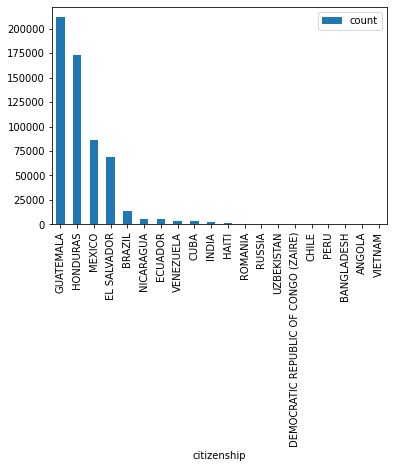

In [33]:
# Plotting this above result 
df_citizen.plot.bar(x='citizenship')